In [1]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from scipy.stats import ttest_ind
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
rng = np.random.default_rng (1)
n, m = 20, 100
X = rng.normal(size=(n, m))

In [4]:
pvals = ttest_1samp(X, 0).pvalue

<Axes: ylabel='Count'>

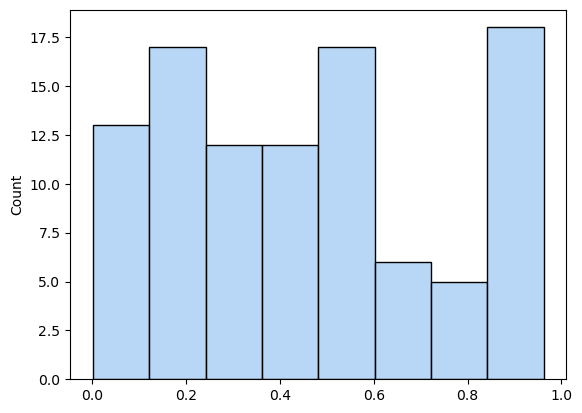

In [5]:
sns.histplot(pvals)

In [6]:
np.sum(pvals< 0.05)

4

In [7]:
# Let's use Homm approach :

ordered_pvalues = np.sort(pvals)
alpha = 0.05
m = len(ordered_pvalues)
for i in range(m):
    if ordered_pvalues[i] > (alpha/(m+1-(i+1))):
        print(i)
        break

0


In [8]:
# Benjamini–Hochberg 

q = 0.1

ordered_pvalues = np.sort(pvals)
m = len(ordered_pvalues)
largest_i = 0
for i in range(m):
    if ordered_pvalues[i] < (q*(i+1))/m:
        largest_i = i
print(largest_i)

0


In [9]:
cherry_picked = ordered_pvalues[:10]

In [10]:
# Let's use Homm approach :

alpha = 0.05
m = len(cherry_picked)
for i in range(m):
    if cherry_picked[i] > (alpha/(m+1-(i+1))):
        print(i)
        break

1


In [11]:
# Benjamini–Hochberg 

q = 0.05

m = len(cherry_picked)
largest_i = 0
for i in range(m):
    if cherry_picked[i] < (q*(i+1))/m:
        largest_i = i
print(largest_i)

0
